In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
# Modeling
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Resize

from ecallisto_dataset import (
    preprocess_spectrogram,
    EcallistoDatasetBinary,
    CustomSpecAugment,
    custom_resize_max
)

import pandas as pd

print(f'PyTorch version {torch.__version__}')
# Check if CUDA is available
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
    device = 'cuda'
else:
    print("GPU is not available.")
    device = 'cpu'

/home/vincenzo/miniconda3/envs/flaresense-v2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version 2.3.0+cu121
GPU is not available.


In [2]:
ds = load_dataset('i4ds/radio-sunburst-ecallisto-paths-df')

In [3]:
# Transforms
resize_func = Compose(
    [
        lambda x: custom_resize_max(x, (224, 224)),  # Resize the image
    ]
)
data_augm_transform = CustomSpecAugment(
    frequency_masking_para=50, method='min'
)


In [10]:
# Transforms

# Data Loader
ds_test = EcallistoDatasetBinary(
    ds['test'],
    resize_func=resize_func,
    data_augm_transform=None, #data_augm_transform,
    normalization_transform=preprocess_spectrogram,
)


test_dataloader = DataLoader(
    ds_test,
    batch_size=4,
    num_workers=1,
    shuffle=False,
    persistent_workers=True,
)


In [11]:
with torch.no_grad():
    for example in test_dataloader:
        example = example
        break

In [19]:
example[2]

('ALASKA-COHOE_63', 'ALASKA-COHOE_63', 'ALASKA-COHOE_63', 'ALASKA-COHOE_63')

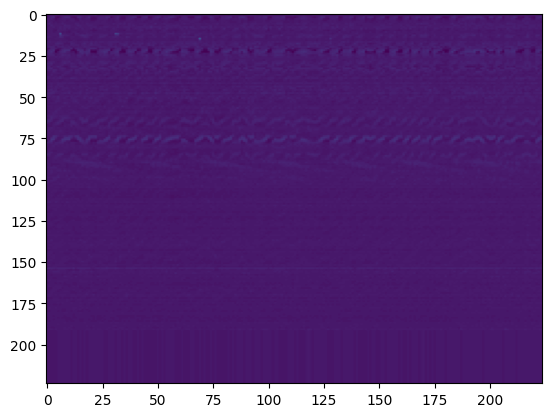

In [7]:
plt.imshow(example[0][0].squeeze(), aspect='auto')

In [ ]:
ds['test'][0]

{'file_path': '/mnt/nas05/data01/vincenzo/ecallisto/data/ALASKA-COHOE_63/0/2023-02-27_18-46-00.parquet',
 'label': 0,
 'antenna': 'ALASKA-COHOE_63',
 'datetime': '2023-02-27_18-46-00'}

In [ ]:
df = pd.read_parquet('/mnt/nas05/data01/vincenzo/ecallisto/data/ALASKA-COHOE_63/0/2023-02-27_18-46-00.parquet')

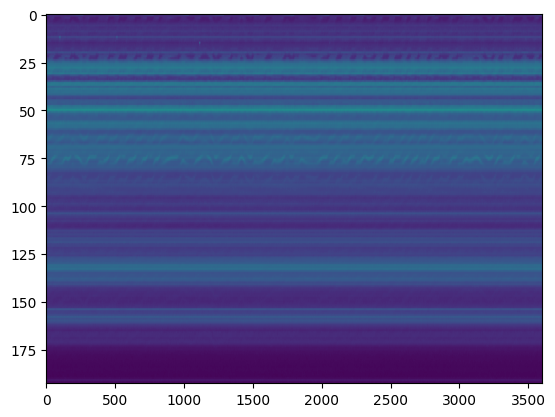

In [ ]:
plt.imshow(df.T, aspect='auto')